In [1]:
from pathlib import Path

import os
import torch
import albumentations as A

from tracenet.utils.loader import get_loaders
from tracenet.utils.plot import show_imgs
from tracenet.datasets.transforms_segm import get_valid_transform_segm

In [2]:
data_dir = '/research/sharedresources/cbi/data_exchange/hangrp/Development/mt_detection/data_synth/lines_2D_64'
model_path = rf'models/happy-mountain-14/best_model.pth'
maxsize = None

train_dir = 'train'
val_dir = 'val'
bs = 4

In [3]:
train_dl, val_dl = get_loaders(data_dir, train_dir=train_dir, val_dir=val_dir, 
                               train_transform=get_valid_transform_segm(),
                               batch_size=bs, maxsize=maxsize, segm_only=True,
                               instance_ratio=0.2, shuffle=False)

In [4]:
imgs, imgs2, targets, labels, masks = next(iter(train_dl));

/research/sharedresources/cbi/public/conda_envs/am_pytorch/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


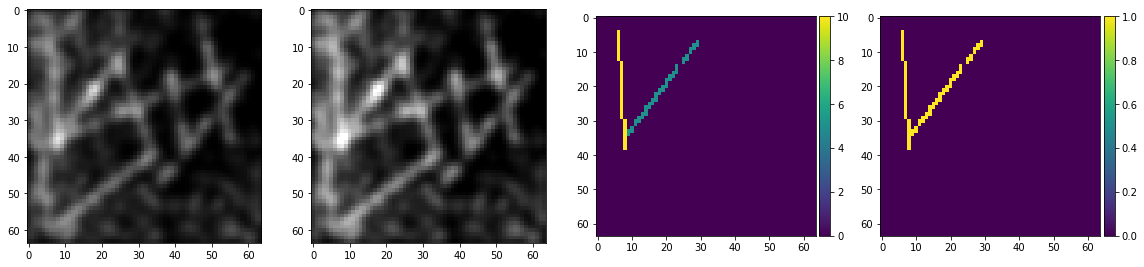

In [5]:
ind = 0
show_imgs([imgs[ind][0], imgs2[ind][0], labels[ind], masks[ind]])

## Prediction

In [6]:
# model = get_detr(n_classes=1, n_points=n_points, 
#                  pretrained=True, state_dict_path=model_path).eval();

In [7]:
# # propagate through the model
# with torch.no_grad():
#     outputs = model(imgs)

# # keep only predictions with 0.7+ confidence
# probas = outputs['pred_logits'].softmax(-1)[ind, :, :-1]
# keep = probas.max(-1).values > 0.9
# img_model = plot_traces(imgs[ind], outputs['pred_boxes'][ind, keep], return_image=True)

In [8]:
# import pylab as plt
# from skimage import io
# fig, ax = plt.subplots(1, 3, figsize=(15,5))
# titles = ['image', 'ground truth', 'predicted']
# for i, im, in enumerate([imgs[ind].numpy().transpose(1,2,0), img_gt, img_model]):
#     plt.sca(ax[i])
#     plt.title(titles[i])
#     s = int(0.6*im.shape[0])
#     io.imshow(im)
# plt.savefig('TRaceNet_real_data_train.png')